# **MRI Anatomical Recognition - body parts binary classification**
### **Abdallah Fekry**
**Model 8**

---

class 0 = Brain

class 1 = Breast

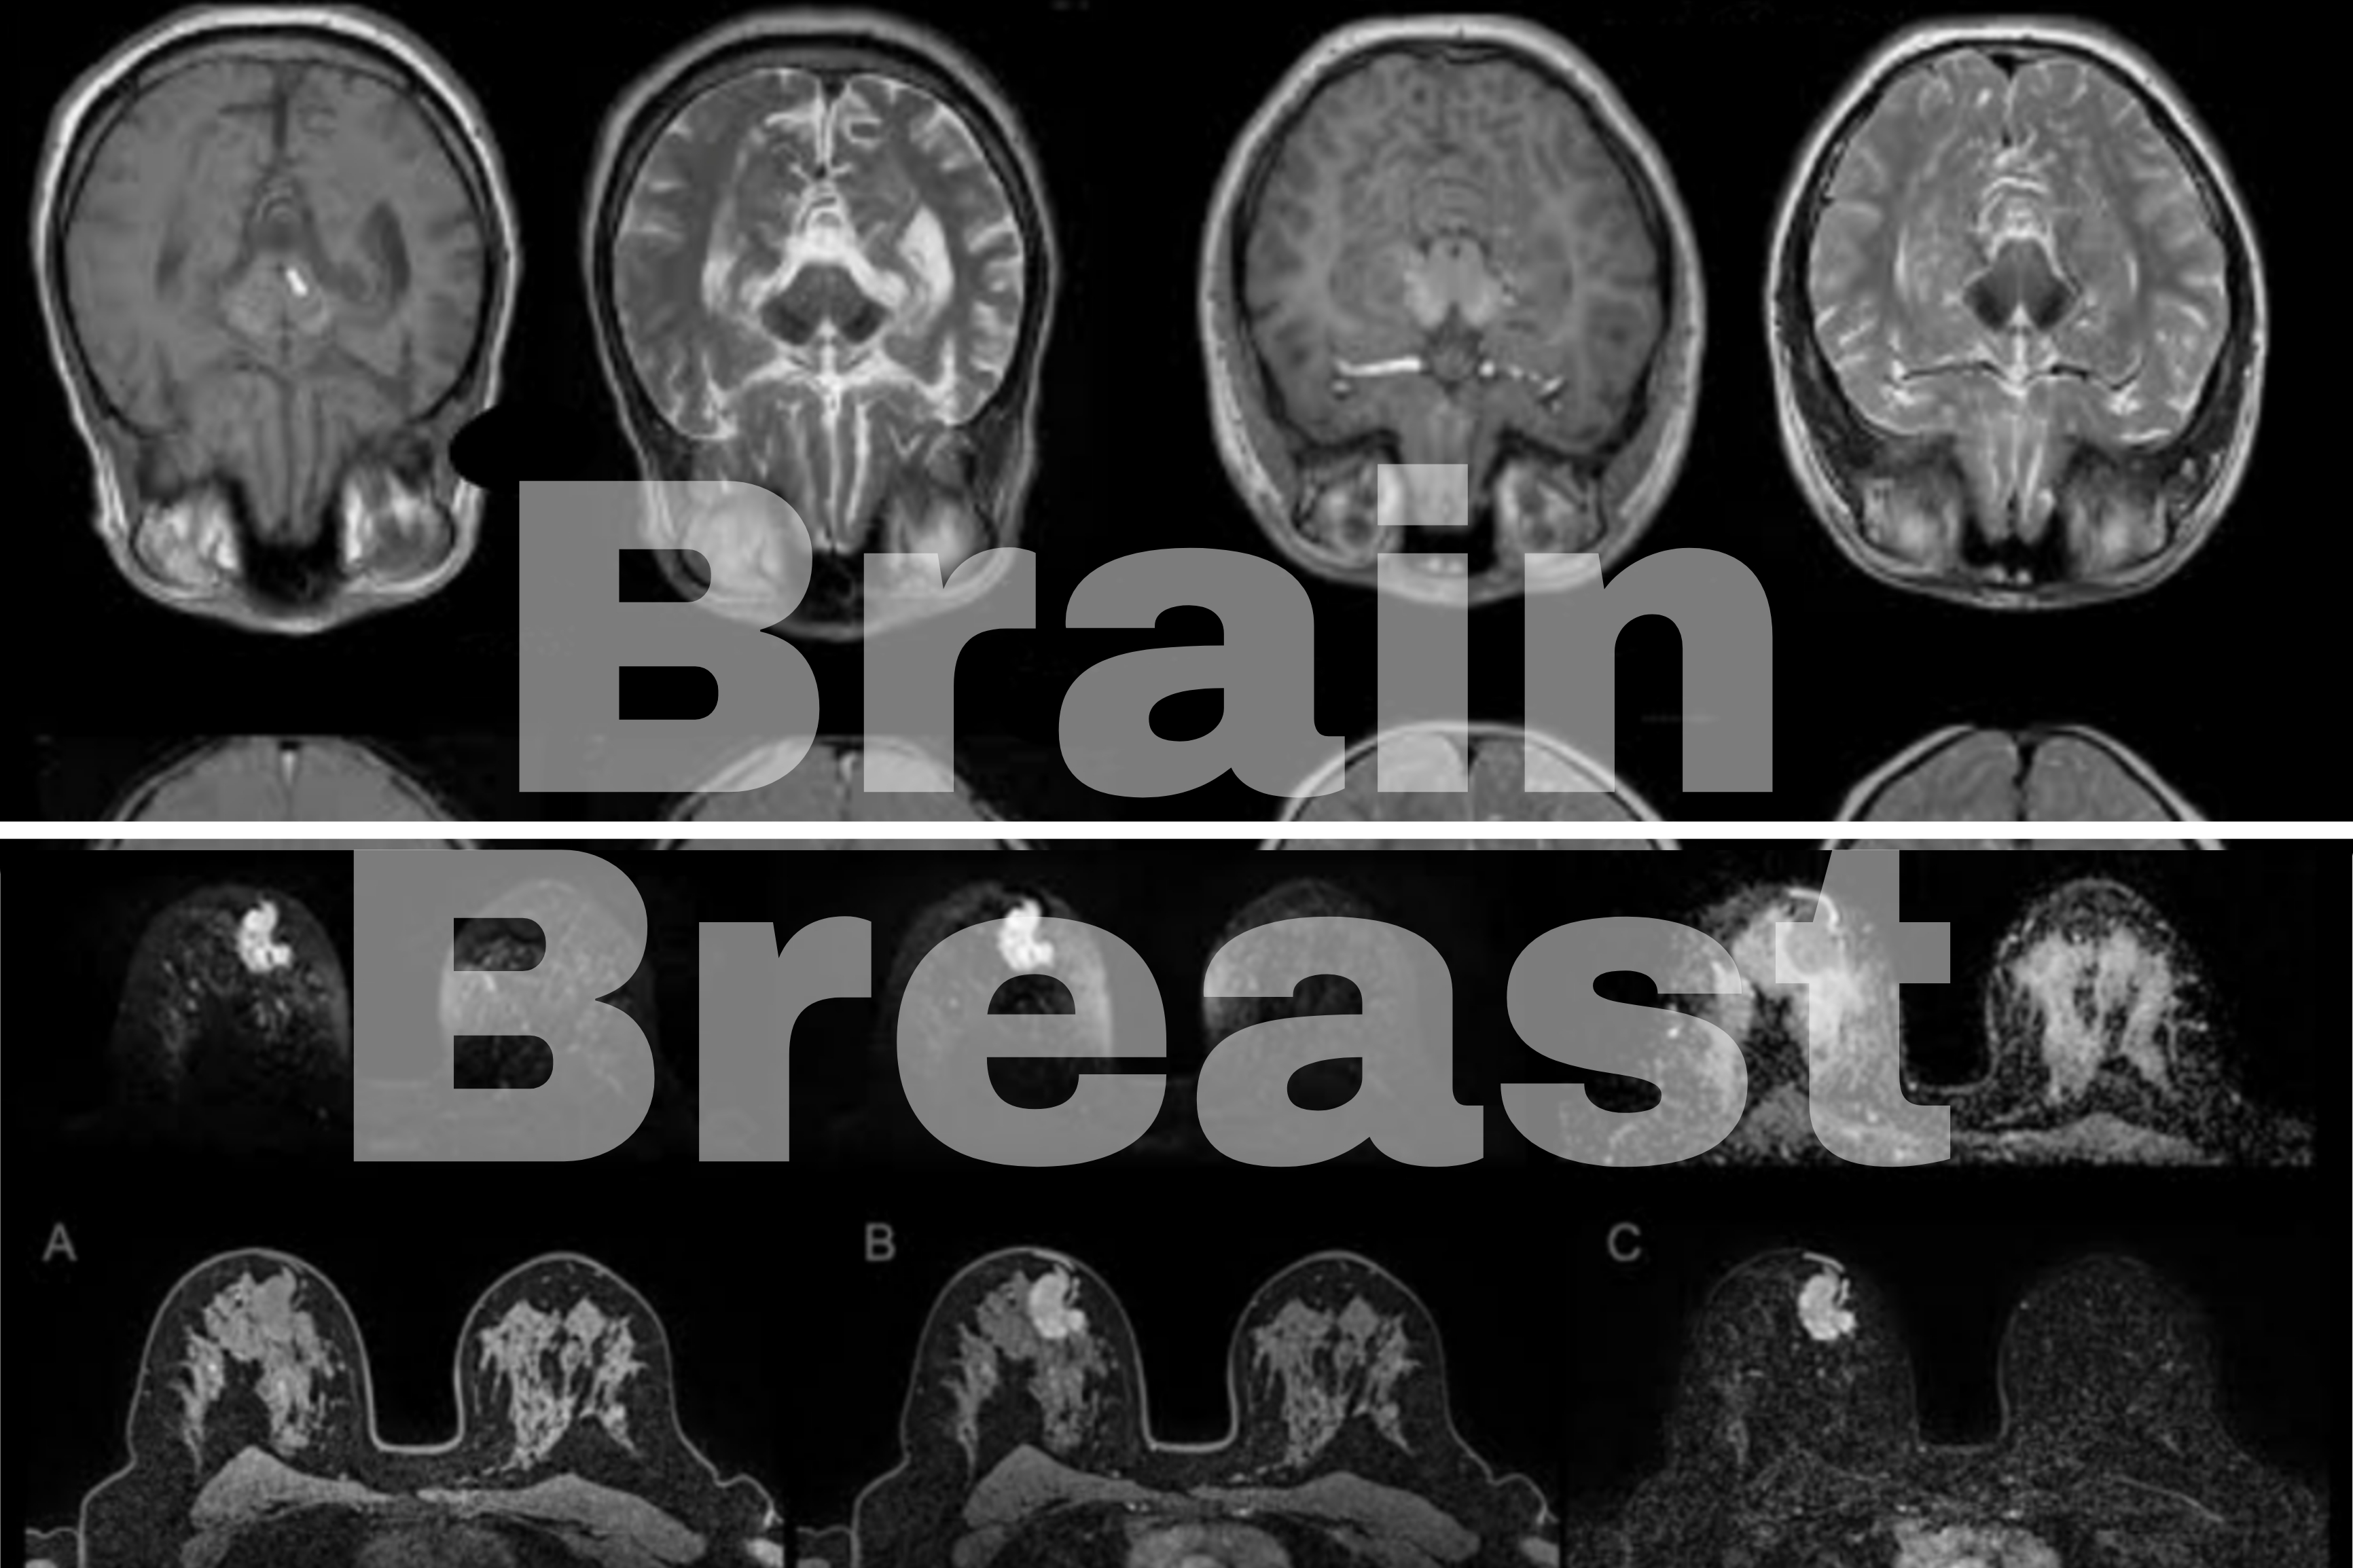

In [9]:
!pip install keras==2.15.0

In [10]:
import keras
keras.__version__

'2.15.0'

In [11]:
classes = {0 : 'Brain MRI',
           1 : 'Breast MRI'}

importing libraries

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/kaggle/input/brain-or-breast-mri/Brain or Breast MRI me/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
test_data = train_datagen.flow_from_directory('/kaggle/input/brain-or-breast-mri/Brain or Breast MRI me/Test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False)

Found 1225 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [14]:
train_data.image_shape

(224, 224, 3)

In [15]:
np.unique(test_data.labels)

array([0, 1], dtype=int32)

In [16]:
train_data.class_indices

{'Brain': 0, 'Breast': 1}

In [17]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [18]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 134264641 (512.18 MB)
Trainable params: 11

In [20]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

In [22]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
batch_size=128
from tensorflow import keras
results = model.fit(train_data, epochs=1, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
                  )

39/39 [==============================] - 9s 204ms/step - loss: 0.0257 - accuracy: 0.9927 - val_loss: 0.1533 - val_accuracy: 0.9886


In [23]:
loss, acc = model.evaluate(test_data)

3/3 [==============================] - 1s 124ms/step - loss: 0.1533 - accuracy: 0.9886


In [24]:
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',round(loss,4),sep='')

Test accuracy = 98.86%
Loss = 0.1533


In [80]:
results.history['val_loss']

[0.057561468333005905,
 0.0,
 0.106357641518116,
 0.0,
 0.11653811484575272,
 0.0,
 0.12040397524833679]

In [82]:
results.history['val_accuracy']

[0.9886363744735718,
 0.0,
 0.9886363744735718,
 0.0,
 0.9886363744735718,
 0.0,
 0.9886363744735718]

In [84]:
i = results.history['val_loss'].index(loss)
i

0

In [85]:
results.history['val_accuracy'][0]

0.9886363744735718

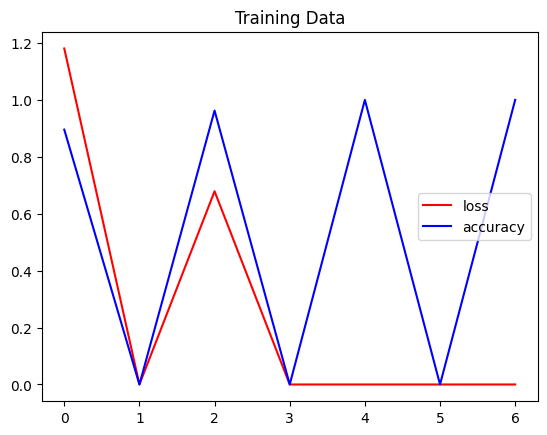

In [86]:
fig = plt.figure()
plt.plot(results.history['loss'], c='red', label='loss')
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
plt.title("Training Data")
plt.legend(loc="center right")
plt.show()

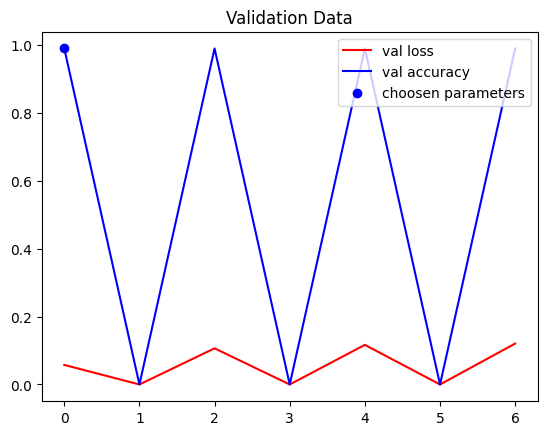

In [89]:
fig = plt.figure()
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.scatter(i ,results.history['val_accuracy'][i], c='blue', label='choosen parameters', marker='o')
plt.title("Validation Data")
plt.legend(loc="upper right")
plt.show()

In [64]:
yp = (model.predict(test_data)>=0.5).astype(int)
yp.shape

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


(88, 1)

In [65]:
yp = yp.reshape(-1,)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Brain Sample


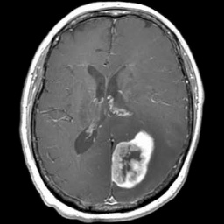

In [66]:
print("Brain Sample")
brain = load_img('/kaggle/input/brain-or-breast-mri/Brain or Breast MRI me/Test/Brain/G_124.jpg',target_size=(224,224))
# plt.imshow()
brain

Breast Sample


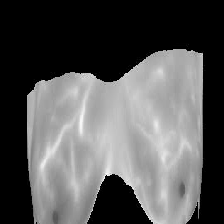

In [67]:
print('Breast Sample')
breast = load_img('/kaggle/input/brain-or-breast-mri/Brain or Breast MRI me/Test/Breast/H_409.jpg',target_size=(224,224))
# plt.imshow()
breast

Text(0.5, 1.0, 'Breast Sample')

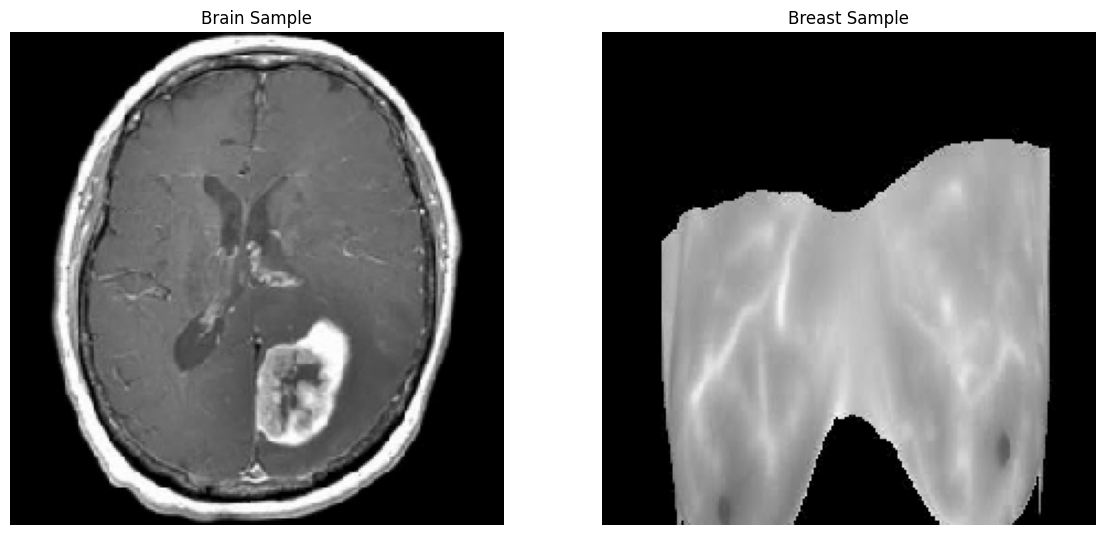

In [68]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(brain)
plt.title('Brain Sample')
fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(breast)
plt.title('Breast Sample')

In [69]:
brain = img_to_array(brain)
breast = img_to_array(breast)
brain = brain/255
breast = breast/255
brain = brain.reshape(1,224,224,3)
breast = breast.reshape(1,224,224,3)
breast.shape

(1, 224, 224, 3)

In [70]:
p1 = (model.predict(brain)>=0.5).astype(int).reshape(1,)
p1 = p1[0]

print("Class ",p1,": ",classes[p1],sep='')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
Class 0: Brain MRI


In [71]:
p1 = (model.predict(breast)>=0.5).astype(int).reshape(1,)
p1 = p1[0]

print("Class ",p1,": ",classes[p1],sep='')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Class 1: Breast MRI


In [72]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,Brain/G_124.jpg,0,0
1,Brain/G_125.jpg,0,0
2,Brain/G_126.jpg,0,0
3,Brain/G_127.jpg,0,0
4,Brain/G_128.jpg,0,0
...,...,...,...
83,Breast/S_149.jpg,1,1
84,Breast/S_162.jpg,1,1
85,Breast/S_163.jpg,1,1
86,Breast/S_164.jpg,1,1


In [73]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [74]:
m = confusion_matrix(test_data.labels,yp)
m

array([[44,  1],
       [ 0, 43]])

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

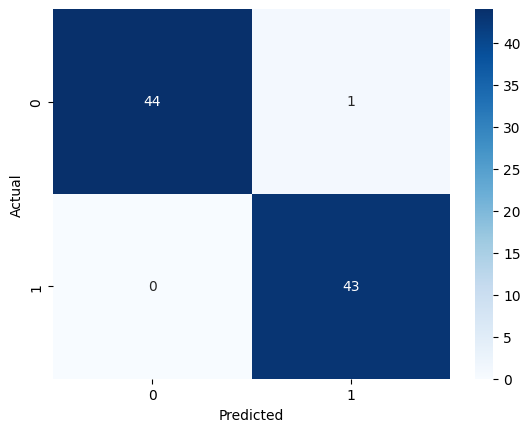

In [75]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

In [25]:
model.save("model6.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'model6.h5')

/kaggle/working


/kaggle/working/model6.h5